In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import config

In [58]:
def timestamp_datetime(value):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(value))

def time_feat(df,featList,featName):
    scaler = StandardScaler()
    tmp = df.groupby(featList).size().reset_index().rename(columns={0:featName})
    tmp[featName] = scaler.fit_transform(tmp[featName].values.reshape(-1,1))
    df = df.merge(tmp,'left',on=featList)
    return df

def process(df):
    df['time'] = df.context_timestamp.apply(timestamp_datetime)
    df['day'] = df.time.apply(lambda x: int(x[8:10]))
    df['hour'] = df.time.apply(lambda x: int(x[11:13]))
    df['min'] = df.time.apply(lambda x: int(x[14:16]))
    del df['time']
    #df['item_property_list_clean'] = df['item_property_list'].apply(lambda x:';'.join(sorted(set(str(x).split(';')))))
    df["missing_feat"] = np.sum((df == -1).values, axis=1)
    return df

In [46]:
dfTest = pd.read_table(config.TEST_FILE,sep=' ',usecols =[16,25])

In [47]:
dfTest = process(dfTest)

In [43]:
tt = dfTest.hour.unique()

In [44]:
tt.sort()
tt

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [48]:
dfTest.head(10)

,context_timestamp,shop_score_description,time,day,hour,missing_feat
0,1536320389,0.964373,2018-09-07 19:39:49,7,19,0
1,1536322611,0.989656,2018-09-07 20:16:51,7,20,0
2,1536335648,0.961470,2018-09-07 23:54:08,7,23,0
3,1536310587,0.930338,2018-09-07 16:56:27,7,16,0
4,1536320745,0.981132,2018-09-07 19:45:45,7,19,0
5,1536299191,0.980872,2018-09-07 13:46:31,7,13,0
6,1536322653,0.984545,2018-09-07 20:17:33,7,20,0
7,1536319013,0.988806,2018-09-07 19:16:53,7,19,0
8,1536325687,0.989476,2018-09-07 21:08:07,7,21,0
9,1536301475,0.955644,2018-09-07 14:24:35,7,14,0


In [52]:
dfTrain = pd.read_table(config.TRAIN_FILE,sep=' ',usecols =[16,26])

In [59]:
dfTrain['is_trade'] = pd.to_numeric(dfTrain['is_trade'],downcast='signed')
dfTrain = process(dfTrain)

In [54]:
dfTrain = dfTrain.loc[dfTrain['day']==7]

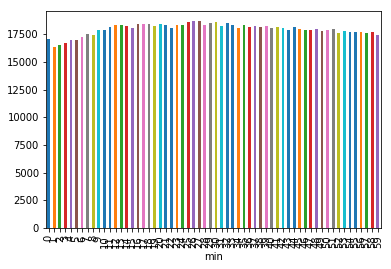

In [60]:
dfTrain.groupby('min')['is_trade'].count().sort_index().plot(kind='bar')

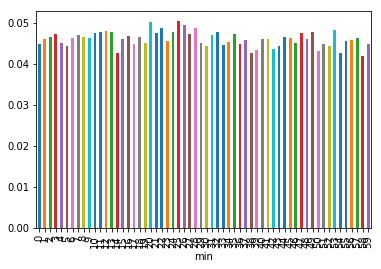

In [61]:
dfTrain.groupby('min')['is_trade'].mean().sort_index().plot(kind='bar')

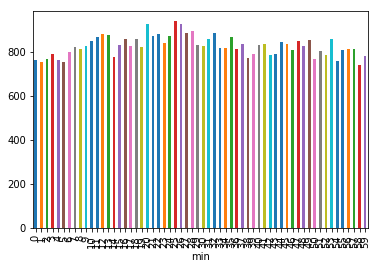

In [62]:
dfTrain.groupby('min')['is_trade'].sum().sort_index().plot(kind='bar')

In [34]:
dfTrain.is_trade.mean()

0.046089075591245622

In [35]:
dfTrain.shape

(1077175, 5)

In [3]:
dfTest = pd.read_table(config.TEST_FILE,sep=' ')
dfTest = process(dfTest)

In [4]:
dfTest.shape

(519888, 31)

In [8]:
dfTest.drop_duplicates().shape

(519888, 31)

In [12]:
dfTest.user_id.nunique()

353263

In [ ]:
dfTest1 = pd.read_table(config.TEST_FILE_OLD,sep=' ')
dfTest2 = pd.read_table(config.TEST_FILE_NEW,sep=' ')

In [ ]:
dfTest1.shape

In [ ]:
dfTest2.shape

In [ ]:
user_set1 = set(dfTest1.user_id.unique().tolist())
user_set2 = set(dfTest2.user_id.unique().tolist())

print(len(user_set1&user_set2))
print(len(user_set1|user_set2))
print(len(user_set1))
print(len(user_set2))

In [ ]:
dfTest = pd.concat([dfTest1,dfTest2])

In [ ]:
dfTest.to_csv("../../Data/advertisment/Raw/round1_ijcai_18_test_20180419.txt",index=False,sep=' ')

In [ ]:
print(dfTest.shape)
print(dfTest.instance_id.nunique())

In [ ]:
dfTest = process(dfTest)

In [ ]:
dfTest['day'].unique()

In [ ]:
trainFile = 'round1_ijcai_18_train_20180301.txt'
testFile = 'round1_ijcai_18_test_a_20180301.txt'
dataDir = '../../Data/advertisment/Raw/'

In [ ]:
dfTrain = pd.read_table(dataDir+trainFile,sep=' ')
dfTrain.drop_duplicates(inplace=True)
#dfTest = pd.read_table(dataDir+testFile,sep=' ')

dfTrain = process(dfTrain)
#dfTest = process(dfTest)

In [ ]:
tmp = ';'.join(dfTrain['predict_category_property'].unique().tolist())

In [ ]:
cateList = []
for i in tmp.split(';'):
    cateList.append(i.split(':')[0])
cateList = list(set(cateList))

In [ ]:
len(cateList)

In [ ]:
userSet = []
for day in range(18,25):
    tmp = dfTrain.loc[dfTrain['day']==day]
    userSet.append(set(tmp.user_id.tolist()))

In [ ]:
for i in range(6):
    print(18+i)
    print(len(userSet[i]))
    print(len(userSet[i]&userSet[i+1]))
    print('\n')

In [ ]:
dfTrain.groupby('shop_id',as_index=False)['day'].agg({'day_appear':'nunique'})['day_appear'].value_counts()

In [ ]:
lbl = LabelEncoder()
dfTrain['user_id_lbl'] = lbl.fit_transform(dfTrain['user_id'])
lbl.classes_



In [ ]:
np.corrcoef(dfTrain.groupby('user_id_lbl')['is_trade'].mean().sort_index(),dfTrain.groupby('user_id_lbl')['is_trade'].mean().sort_index().index)

In [ ]:
dfTrain.groupby('user_id_lbl')['is_trade'].count().sort_index().plot(kind='bar')

In [ ]:
dfTrain.groupby('user_id_lbl')['is_trade'].mean().sort_index().plot(kind='bar')

In [ ]:
dfTrain.columns

In [ ]:
for var in dfTrain:
    if var not in config.KEYS+['context_timestamp']+config.NUMERIC_COLS:
        print(var,dfTrain[var].nunique())
        if dfTrain[var].nunique()>200:
            continue
        print(sorted(dfTrain[var].unique().tolist()))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

le.classes_

le.transform([1, 1, 2, 6]) 

le.inverse_transform([0, 0, 1, 2])

In [ ]:
le.classes_ = np.array([6,2,1])

In [ ]:
le.transform([1, 1, 2, 6]) 

In [ ]:
le.fit([1, 2, 2, 6])
le.classes_ 

In [ ]:
tmp = dfTrain.loc[dfTrain.duplicated(['user_id','item_id'],False)]
#.sort_values(['user_id','item_id','context_timestamp'])['is_trade'].mean()

tmp['Rank'] = tmp.groupby(['user_id','item_id'])['context_timestamp'].rank()


In [ ]:
dfTrain['user_cnt'] = dfTrain.groupby(['user_id'], as_index=False)['instance_id'].agg({'user_cnt': 'count'})['user_cnt']
for col in ['user_gender_id']:
    itemcnt = dfTrain.groupby([col, 'user_id'], as_index=False)['instance_id'].agg({str(col) + '_user_cnt': 'count'})

In [ ]:
tmp = dfTrain.drop_duplicates(['user_id','user_gender_id'])
user_list = tmp['user_id'].value_counts()[tmp['user_id'].value_counts()>1].index

In [ ]:
dfTrain.loc[dfTrain['user_id'].isin(user_list),'is_trade'].count()

In [ ]:
itemcnt

In [ ]:
tmp.groupby('Rank')['is_trade'].mean()

In [ ]:
dfTrain.loc[dfTrain.duplicated(['user_id','item_id'],False)].sort_values(['user_id','item_id','context_timestamp'])[config.KEYS+['context_timestamp']]

In [ ]:
print(dfTest.user_id.nunique()*1.0/dfTest.shape[0])
print(dfTrain.user_id.nunique()*1.0/dfTrain.shape[0])

In [ ]:
1/(dfTest.user_id.nunique()*1.0/dfTest.shape[0])

In [ ]:
1/(dfTrain.user_id.nunique()*1.0/dfTrain.shape[0])

In [ ]:
dfTest.item_category_list

In [ ]:
dfTest.user_id.value_counts().describe()

In [ ]:
a = -0.31284*18371/(-0.31284-18.10784)
print(a)
312/18371

In [ ]:
-0.31284*18371

In [ ]:
import sys
np.log(sys.float_info.epsilon)

In [ ]:
dfTest.user_id.value_counts().reset_index()

In [ ]:
for i in dfTrain.day.unique():
    print(i)
    print('\n')
    tmp = dfTrain.loc[dfTrain.day==i]
    #tmp = tmp.merge(tmp.user_id.value_counts().reset_index(),'inner',left_on='user_id',right_on='index')
    tmp['rank'] = tmp.groupby('user_id')['context_timestamp'].rank(method='first')
    print(pd.concat([tmp.groupby('rank')['is_trade'].mean(),tmp.groupby('rank')['is_trade'].count()],axis=1))
    

In [ ]:
tmp.groupby('rank')['is_trade'].count().plot()

In [ ]:
tmp.groupby('rank')['is_trade'].mean().plot()

In [ ]:
import config
dfTrain.loc[dfTrain['rank']==4.5].sort_values('user_id')[config.KEYS]

In [ ]:
dfTrain.drop_duplicates(['context_id','context_timestamp']).shape

In [ ]:
dfTrain.context_timestamp.nunique()

In [ ]:
count = CountVectorizer(ngram_range=(1,1))
tt =count.fit_transform(dfTrain['item_property_list_clean'].apply(lambda x: x.replace(';',' ')))

In [ ]:
sum_value = tt[:dfTrain.shape[0],:].getnnz(axis=0)

In [ ]:
testdf = pd.DataFrame(tt[:,sum_value==100].todense())

In [ ]:
testdf.T.drop_duplicates().shape

In [ ]:
lbl = LabelEncoder()

In [ ]:
lbl.fit_transform(dfTrain['user_id'])

In [ ]:
tt = tt[:, np.array(np.clip(tt[:dfTrain.shape[0],:].getnnz(axis=0) -2000, 0, 1), dtype=bool)]
tt.shape

In [ ]:
tt.todense()

In [ ]:
print(dfTrain['item_property_list_clean'].nunique())
print(dfTrain['item_property_list'].nunique())

In [ ]:
dfTrain['item_property_list'].apply(lambda x:';'.join(sorted(set(x.split(';'))))).value_counts()

In [ ]:
def string_process(df):
    

In [ ]:
grouped = dfTrain.groupby(['context_page_id'])

grouped['is_trade'].agg('mean').sort_index(ascending=True)

In [ ]:
dfTrain.loc[dfTrain['user_id']==5730330586479721983]

In [ ]:
tt.data.max()

In [ ]:
dfTrain.dtypes

In [ ]:
dfTrain.head(5)

In [ ]:
dfTrain['predict_category_property_bin'] = dfTrain['predict_category_property'].apply(lambda x: x.count(';'))
dfTrain['predict_category_property_bin'].describe()

In [ ]:
dfTrain.loc[dfTrain['predict_category_property_bin']==0,'predict_category_property']

In [ ]:
for i in range(3):
    print(dfTrain['item_category_list_bin_%d'%i].unique())

In [ ]:
tt = np.array(';'.join(dfTrain['item_property_list'].tolist()).split(';'))

In [ ]:
np.unique(tt).shape

In [ ]:
dfTrain['shop_id'].value_counts()[dfTrain['shop_id'].value_counts()>1].index

In [ ]:
dfTrain.loc[dfTrain['user_id']==7201324926905945581,'is_trade']

In [ ]:
def timestamp_datetime(value):
    format = '%Y-%m-%d %H:%M:%S'
    value = time.localtime(value)
    dt = time.strftime(format, value)
    return dt

dfTrain['context_timestamp_date'] = dfTrain['context_timestamp'].map(timestamp_datetime).apply(lambda x: x[:10])
dfTest['context_timestamp_date'] = dfTest['context_timestamp'].map(timestamp_datetime).apply(lambda x: x[:10])

In [ ]:
dfTrain['context_timestamp_date'].value_counts()

In [ ]:
dfTrain.groupby(['context_timestamp_date'])['is_trade'].mean()

In [ ]:
print(dfTrain['context_timestamp_date'].max())
print(dfTrain['context_timestamp_date'].min())
print(dfTest['context_timestamp_date'].max())
print(dfTest['context_timestamp_date'].min())

In [ ]:
dfTest.shape

In [ ]:
for i in dfTrain['predict_category_property'].tolist()[:10]:
    tmpDict ={}
    for j in i.split(';'):
        m,n = j.split(':')
        tmpDict[m] = n.split(',')

In [ ]:
def dictgen(i):
    tmpDict ={}
    for j in i.split(';'):
        try:
            m,n = j.split(':')
            '''if not '-1' in n.split(','):
                tmpDict[m] = len(n.split(','))'''
            tmpDict[m] = len(n.split(',')) if not '-1' in n.split(',') else -1
        except: 
                tmpDict ={'-1':'-1'}
    return tmpDict

In [ ]:
dfTrain['predict_category_property_dict'] = dfTrain['predict_category_property'].map(dictgen)

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=True)
X = v.fit_transform(dfTrain['predict_category_property_dict'].tolist())
X.shape

In [ ]:
dfTrain['predict_category_property_dict'].tolist()[0:10]

In [ ]:
idTrain = set(dfTrain.user_id.unique().tolist())
idTest = set(dfTest.user_id.unique().tolist())

In [ ]:
print(len(idTrain))
print(len(idTest))
print(len(idTrain&idTest))


In [ ]:
dfTrain.shape

In [ ]:
dfTest.shape

In [ ]:
np.log(0.95)

In [ ]:
1.5/180000